# Image correlation and image convolution

In [130]:
import numpy as np
from scipy.signal import correlate2d, convolve2d
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

## Image correlation


Correlation:

$
\begin{vmatrix}
5 & -6 & 1 & 9 \\
2 & 3 & -1 & 10 \\
1 & 4 & 0 & -2 \\
-9 & 2 & -2 & -5
\end{vmatrix} 
\times \frac{1}{9}
\begin{vmatrix}
1 & 1 & 1  \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{vmatrix}
=
\begin{vmatrix}
1 & 2  \\
0 & 1
\end{vmatrix}
$

For the first element:
$\frac{1}{9} * (5 * 1 - 6 * 1 + 1 * 1 + 2 * 1 + 3 * 1 - 1 * 1 + 1 * 1 + 4 * 1 + 0 * 1) = \frac{1}{9} * 9 = 1$

For the second element:
$\frac{1}{9} * (- 6 * 1 + 1 * 1 + 9 * 1 + 3 * 1 - 1 * 1 + 10 * 1 + 4 * 1 + 0 * 1 - 2 * 1) = \frac{1}{9} * 18 = 2$

etc.

The kernel
(
$\frac{1}{9}
\begin{vmatrix}
1 & 1 & 1  \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{vmatrix}
$
,
$
\frac{1}{25}
\begin{vmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{vmatrix}
$,
etc.) is called box-filter.

In [131]:
arr = np.array([[5, -6, 1, 9],
                [2, 3, -1, 10],
                [1, 4, 0, -2],
                [-9, 2, -2, -5]])

kernel = 1/9 * np.ones((3,3))
correlate2d(arr, kernel, mode='valid')

array([[1., 2.],
       [0., 1.]])

In [132]:
correlate2d(arr, kernel, mode='same', boundary='fill', fillvalue=0)

array([[ 0.44444444,  0.44444444,  1.77777778,  2.11111111],
       [ 1.        ,  1.        ,  2.        ,  1.88888889],
       [ 0.33333333,  0.        ,  1.        ,  0.        ],
       [-0.22222222, -0.44444444, -0.33333333, -1.        ]])

/Users/Vasily/.virtualenvs/timi/lib/python3.6/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


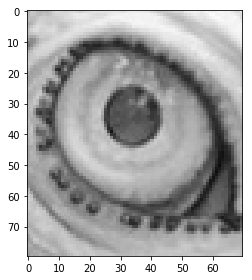

In [133]:
img = imread('parrot.png', as_grey =True)
img = img[190:270, 990:1060]
imshow(img)

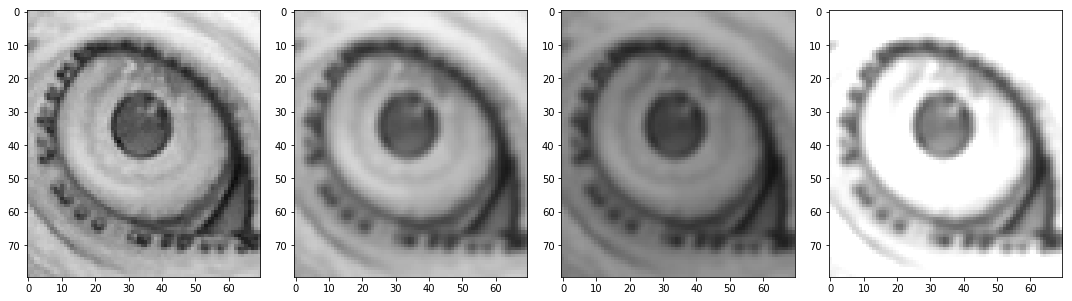

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(141)
imshow(img)
plt.subplot(142)
imshow(correlate2d(img, kernel, mode='same', boundary='symm'))
plt.subplot(143)
kernel_1 = 1 / 12 * np.ones((3,3))
imshow(correlate2d(img, kernel_1, mode='same', boundary='symm'))
plt.subplot(144)
kernel_2 = 1 / 6 * np.ones((3,3))
imshow(np.clip(correlate2d(img, kernel_2, mode='same', boundary='symm'), 0, 1))

$ Kernel =
\frac{1}{16}
\begin{vmatrix}
1 & 2 & 1  \\
2 & 4 & 2 \\
1 & 2 & 1 
\end{vmatrix}
$

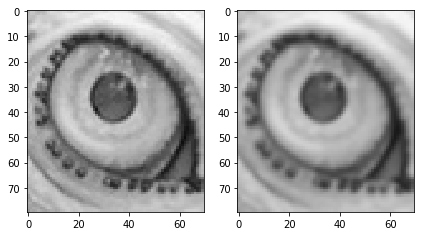

In [6]:
plt.figure(figsize=(6,5))
plt.subplot(121)
imshow(img)
plt.subplot(122)
kernel = 1 / 16 * np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]
                           ])
imshow(correlate2d(img, kernel, mode='same', boundary='symm'))

## Question: What do the kernel below?
$ Kernel =
\begin{vmatrix}
0 & 0 & 0  \\
0 & 0 & 1 \\
0 & 0 & 0 
\end{vmatrix}
$

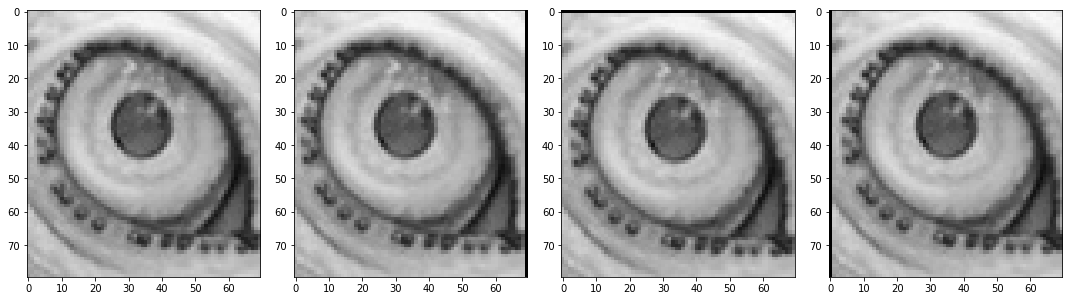

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(141)
imshow(img)
plt.subplot(142)
kernel = np.zeros((3,3))
kernel[1,2] = 1
imshow(correlate2d(img, kernel, mode='same'))
plt.subplot(143)
kernel = np.zeros((3,3))
kernel[0,1] = 1
imshow(correlate2d(img, kernel, mode='same'))
plt.subplot(144)
kernel = np.zeros((3,3))
kernel[1,0] = 1
imshow(correlate2d(img, kernel, mode='same'))

Correlation can be used as method of finding patterns.
Let's try to find parrot's eye on the big image.

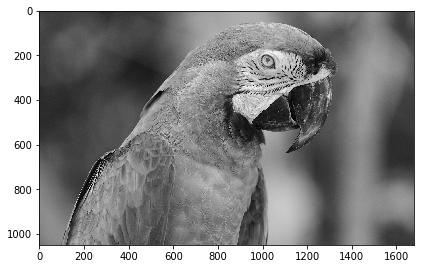

In [21]:
img = imread('parrot.png', as_grey =True)
imshow(img)

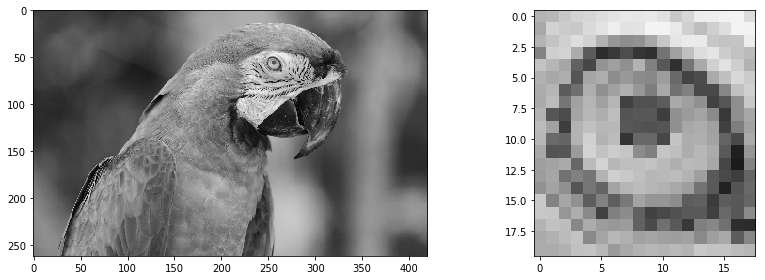

In [28]:
koef_resize = 4
plt.figure(figsize=(13,4))
plt.subplot(121)
img_big = resize(img, (img.shape[0] // koef_resize, img.shape[1] // koef_resize))
imshow(img_big)
plt.subplot(122)
img_eye = img_big[190 // koef_resize:270 // koef_resize, 990 // koef_resize:1060 // koef_resize]
imshow(img_eye)

/Users/Vasily/.virtualenvs/timi/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


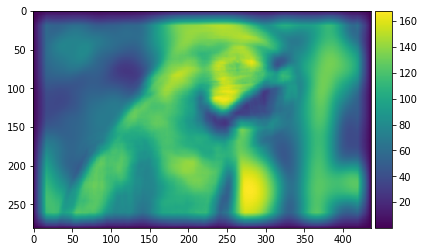

In [31]:
maps = correlate2d(img_big, img_eye)
imshow(maps)

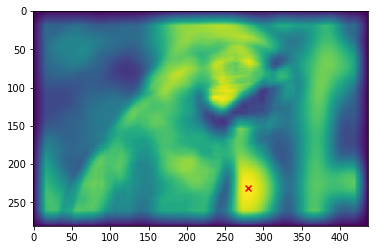

In [42]:
plt.imshow(maps)
x, y = np.where(maps == maps.max())
plt.scatter(y, x, c = 'r', marker='x')

## Image convolution
The same thing as image correlation, but the kernel should be flipped sequentially on a horizontal way and a vertical way.

$
\begin{vmatrix}
1 & 2 & 3  \\
4 & 5 & 6 \\
7 & 8 & 9 
\end{vmatrix}
->
\begin{vmatrix}
7 & 8 & 9  \\
4 & 5 & 6 \\
1 & 2 & 3 
\end{vmatrix}
->
\begin{vmatrix}
9 & 8 & 7  \\
6 & 5 & 4 \\
3 & 2 & 1 
\end{vmatrix}
$

In [45]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

In [47]:
a[::-1,::-1]

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

Text(0.5, 1.0, 'kernel convolution')

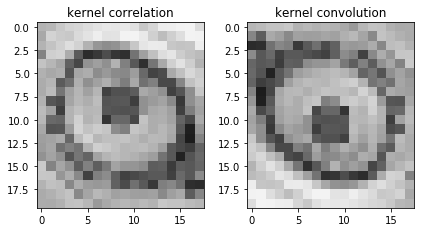

In [51]:
plt.figure(figsize=(6,5))
plt.subplot(121)
imshow(img_eye)
plt.title('kernel correlation')
plt.subplot(122)
imshow(img_eye[::-1,::-1])
plt.title('kernel convolution')

## The box-filter

Image convolution or image correlation
with kernels
$\frac{1}{9}
\begin{vmatrix}
1 & 1 & 1  \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{vmatrix}
$
,
$
\frac{1}{25}
\begin{vmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{vmatrix}
$,
etc. are called the box filtering.

It is a time consuming operation because it requires to execute $N^2 \times k^2$ operation if you have the square image $N\times N$ and the kernel $k \times k$. It takes a lot of time if we use big kernels and big images.

Complexity is $O(N,k) = N^2 \times k^2$

How we can speed up the algorithm?

We have to use integral image.

In [53]:
from skimage.transform import integral_image

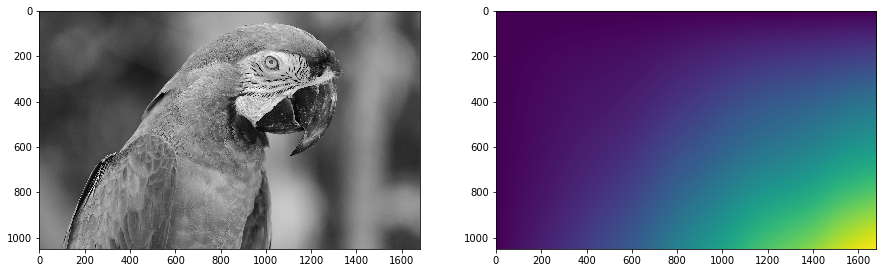

In [62]:
img = imread('parrot.png', as_grey =True)
integral_img = integral_image(img)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(integral_img)

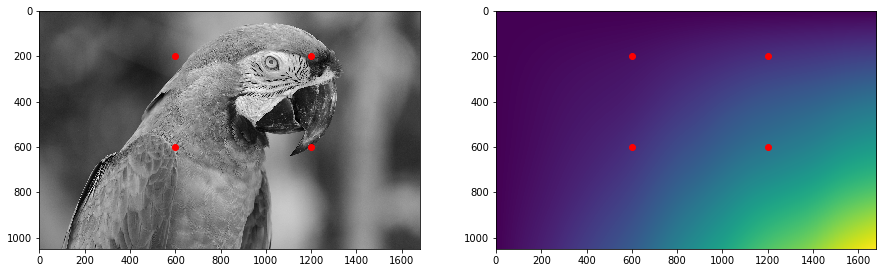

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.scatter([1200, 1200, 600, 600], [200, 600, 200, 600], marker='o', c = 'r')
plt.subplot(122)
plt.imshow(integral_img)
plt.scatter([1200, 1200, 600, 600], [200, 600, 200, 600], marker='o', c = 'r')

$Sum = A + B - C - D$

The complexity of new approach is $O(N) = 4 \times N^2 + N^2$ which is less than $O(N,k) = N^2 \times k^2$

## Gaussian filter

$G_\sigma(x,y) = \frac{1}{2 \pi \sigma^2} e^{\frac{-x^2 -y^2}{2 \sigma^2}}$

In [86]:
from mpl_toolkits.mplot3d import Axes3D 

In [89]:
def gauss_filt(sigma, x, y):
    return 1 / (2 * np.pi * sigma ** 2) * np.exp((-x ** 2 - y ** 2) / (2 * sigma ** 2))

In [116]:
x, y = np.meshgrid(np.arange(-5, 5, 0.01), np.arange(-5, 5, 0.01))

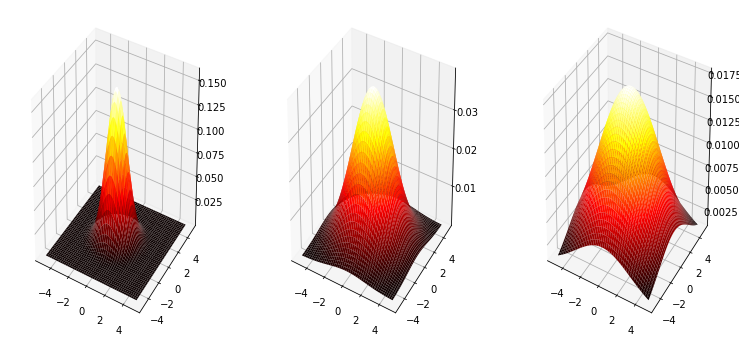

In [117]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(x, y, gauss_filt(1, x, y), cmap = plt.cm.hot)
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(x, y, gauss_filt(2, x, y), cmap = plt.cm.hot)
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(x, y, gauss_filt(3, x, y), cmap = plt.cm.hot)

In [126]:
def gauss(sigma, x):
    return 1 / ((2 * np.pi) ** (1/2) * sigma) * np.exp((-x ** 2) / (2 * sigma ** 2))

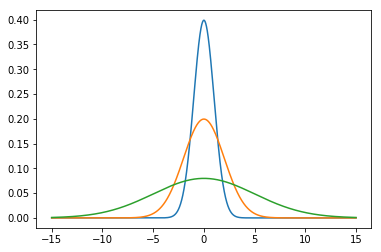

In [129]:
x = np.arange(-15, 15, 0.01)
plt.plot(x, gauss(1, x))
plt.plot(x, gauss(2, x))
plt.plot(x, gauss(5, x))